## FireProtDB - ddG Target Class (Multiclass classification) - Softmax Regression Classifier ##

In [1]:
#Initial setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings("ignore")

print("Setup Complete")

Setup Complete


In [2]:
ddG_df = pd.read_csv('Apr10FireProtDB_FeatGen_targetclass.csv')
print(ddG_df.columns)
ddG_df.head()

Index(['protein_name', 'uniprot_id', 'ddG', 'secondary_structure', 'asa',
       'b_factor', 'pH', 'sequence', 'Aliphatic Index', 'Instability index',
       'Isoelectric point', 'Hydrophobicity', 'Aromaticity', 'MEC',
       'Molecular weight', 'Fraction helix', 'Fraction turn', 'Fraction sheet',
       'target_class'],
      dtype='object')


,protein_name,uniprot_id,ddG,secondary_structure,asa,b_factor,pH,sequence,Aliphatic Index,Instability index,Isoelectric point,Hydrophobicity,Aromaticity,MEC,Molecular weight,Fraction helix,Fraction turn,Fraction sheet,target_class
0,Interleukin-1 beta,P01584,0.8,E,5.27,17.64,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,0
1,Interleukin-1 beta,P01584,0.7,E,5.27,17.64,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,0
2,Interleukin-1 beta,P01584,1.9,E,5.27,17.64,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,1
3,Interleukin-1 beta,P01584,2.6,E,5.27,17.64,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,1
4,Interleukin-1 beta,P01584,0.5,G,87.91,34.91,6.5,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...,71.003717,53.863197,4.704188,-0.420074,0.111524,22920,30747.5732,0.334572,0.301115,0.330855,0


In [5]:
ddG_df = ddG_df.dropna()
ddG_df = ddG_df.drop(['protein_name',
                      'uniprot_id',
                      'ddG',
                      'secondary_structure',
                      'sequence',
                      'MEC',
                      'Aliphatic Index'], axis=1)

y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

In [6]:
print(ddG_df.shape)
ddG_df.head()

(3261, 12)


,asa,b_factor,pH,Instability index,Isoelectric point,Hydrophobicity,Aromaticity,Molecular weight,Fraction helix,Fraction turn,Fraction sheet,target_class
0,5.27,17.64,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,0
1,5.27,17.64,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,0
2,5.27,17.64,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,1
3,5.27,17.64,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,1
4,87.91,34.91,6.5,53.863197,4.704188,-0.420074,0.111524,30747.5732,0.334572,0.301115,0.330855,0


## MinMaxScaler ##

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns = [cols])
# X_test = pd.DataFrame(X_test, columns = [cols])

## Test size 20% ##

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

cols = X_train.columns

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

#Testing set accuracy
y_pred_test = logreg.predict(X_test)
print('Model (test set) accuracy score: {0:04f}'.format(accuracy_score(y_test, y_pred_test)))
#Training set accuracy
y_pred_train = logreg.predict(X_train)
print('Model (train set) accuracy score: {0:04f}'.format(accuracy_score(y_train, y_pred_train)))

Model (test set) accuracy score: 0.736600
Model (train set) accuracy score: 0.716258


## Test size 30% ##

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

cols = X_train.columns

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

#Testing set accuracy
y_pred_test = logreg.predict(X_test)
print('Model (test set) accuracy score: {0:04f}'.format(accuracy_score(y_test, y_pred_test)))
#Training set accuracy
y_pred_train = logreg.predict(X_train)
print('Model (train set) accuracy score: {0:04f}'.format(accuracy_score(y_train, y_pred_train)))

Model (test set) accuracy score: 0.722165
Model (train set) accuracy score: 0.718230


## GridSearch for best parameters ##

In [14]:
param_grid_logreg = {
    'penalty': ['l2'],  # Regularization method (L2 is used for softmax)
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength (smaller = stronger regularization)
    'solver': ['lbfgs', 'saga'],  # Optimization algorithm (saga supports large datasets and multiclass)
    'multi_class': ['multinomial'],  # Use softmax (multinomial) for multiclass problems
    'max_iter': [1000]  # Maximum number of iterations for convergence
}

In [22]:
grid_search_cv = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, n_jobs=1, verbose=0, scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

best_params = grid_search_cv.best_params_
best_model = grid_search_cv.best_estimator_

print('Best Parameters: ', best_params)
print('Best Model: ', best_model)

best_accuracy = grid_search_cv.best_score_
print(f'Best Cross-Validation Accuracy: {best_accuracy:.2f}')

Best Parameters:  {'C': 0.01, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Best Model:  LogisticRegression(C=0.01, max_iter=1000, multi_class='multinomial',
                   random_state=0)
Best Cross-Validation Accuracy: 0.72


## Best parameters ##

In [30]:
logreg_best = LogisticRegression(C=0.01, max_iter=1000, multi_class='multinomial', random_state=0)
logreg_best.fit(X_train, y_train)
y_pred_best = logreg_best.predict(X_test)
print("Softmax regression best accuracy (best parameters): {0:04f}".format(accuracy_score(y_test, y_pred_best)))
print('Training set score: {:.4f}'.format(logreg_best.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg_best.score(X_test, y_test)))

Softmax regression best accuracy (best parameters): 0.744257
Training set score: 0.7205
Test set score: 0.7443


## Evaluation ##

In [21]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred_test))

Final classification report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60       216
           1       0.76      0.87      0.81       420
           2       0.00      0.00      0.00        17

    accuracy                           0.74       653
   macro avg       0.48      0.47      0.47       653
weighted avg       0.71      0.74      0.72       653



In [32]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred_test))

Final classification report:
              precision    recall  f1-score   support

           0       0.66      0.56      0.60       216
           1       0.77      0.86      0.81       420
           2       0.00      0.00      0.00        17

    accuracy                           0.74       653
   macro avg       0.47      0.47      0.47       653
weighted avg       0.71      0.74      0.72       653



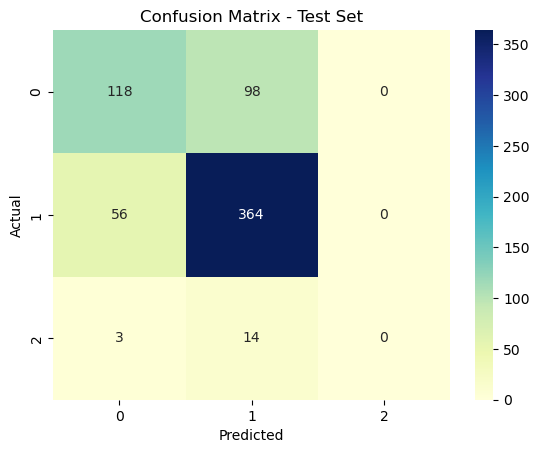

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()